O mês da base de dados é 2019-01


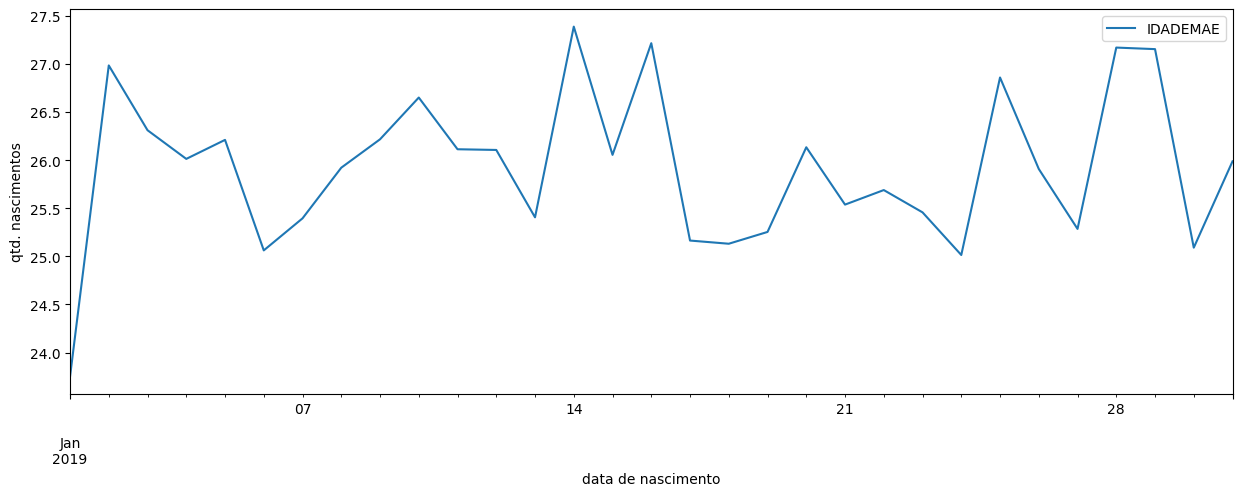

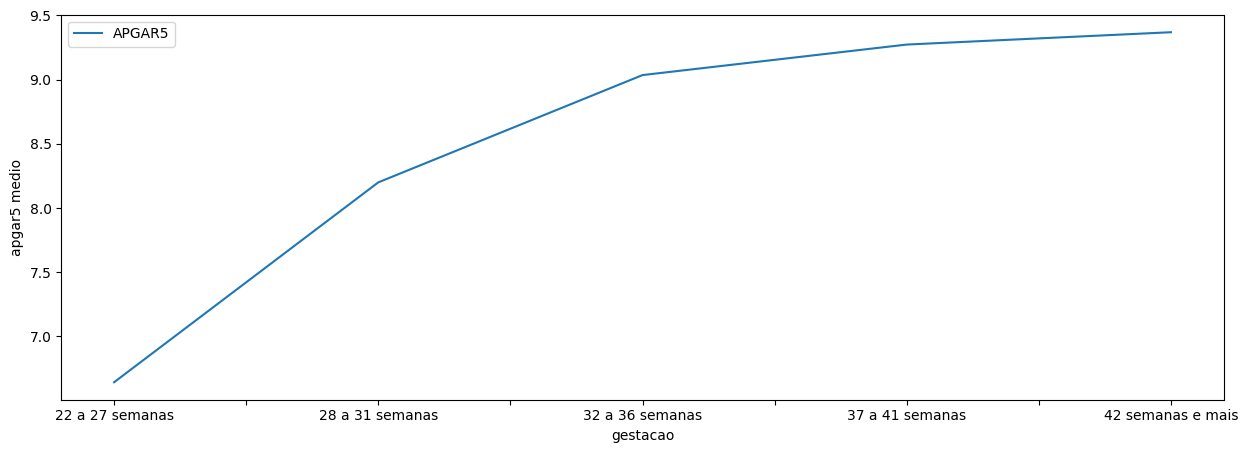

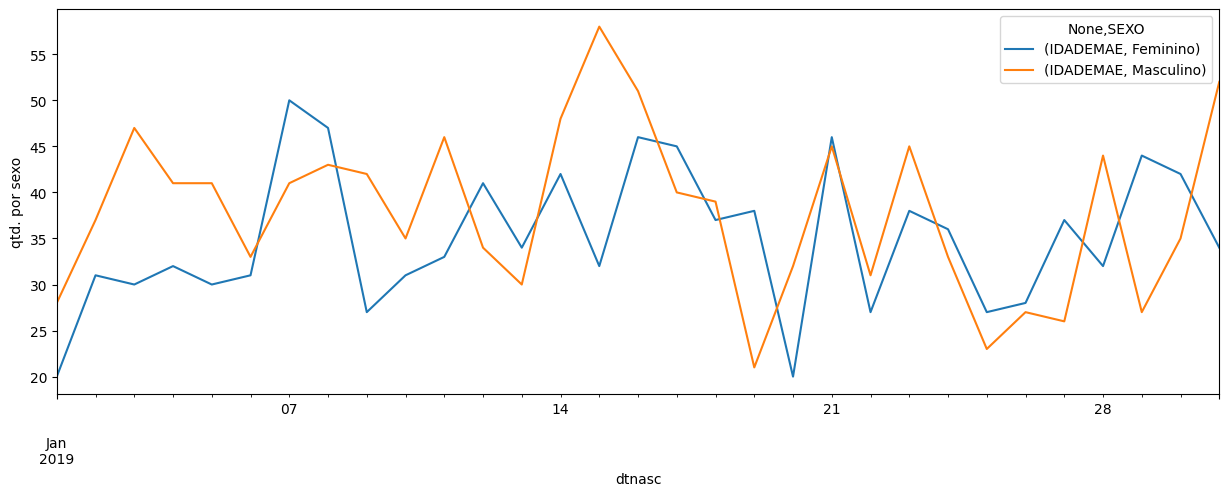

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('SINASC_RO_2019.csv')
mes = int(input('Digite o mês da análise: '))
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df = df.loc[df['DTNASC'].dt.month == mes]
df = df[['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC', 'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI']]
max_data = df['DTNASC'].max().strftime('%Y-%m')
print(f'O mês da base de dados é {max_data}')

def plot_pivot_tabela(df, values, index, aggfunc, ylabel, xlabel, opcao='nada'):
    
    if opcao == 'unstack':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).unstack().plot(figsize=[15, 5])
    elif opcao == 'nada':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=values, index=index, aggfunc=aggfunc).sort_values(values).plot(figsize=[15, 5])

    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)


    max_data = df['DTNASC'].max().strftime('%Y-%m')
    try:
        os.makedirs(f'./output/figs/{max_data}')
        plt.savefig(f'./output/figs/{max_data}/{ylabel}.png')
    except:
        plt.savefig(f'./output/figs/{max_data}/{ylabel}.png')

    
    return None

plot_pivot_tabela(df, 'IDADEMAE', 'DTNASC', 'mean', 'qtd. nascimentos', 'data de nascimento')
plot_pivot_tabela(df, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio', 'gestacao', 'sort')
plot_pivot_tabela(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'count', 'qtd. por sexo', 'dtnasc', 'unstack')

Decidi ir um pouco além já neste exercício para automatizá-lo
1. Já inseri a parte de criar a pasta e o arquivo dentro da própria função, para não precisar digitar o comando de exportar.
2. Inseri um "input", para selecionar o mês da análise, para não precisar ficando gerando a base mês por mês e alterar o código toda vez que for executá-lo.
3. O ideal desse código seria executá-lo em um script.py, porém estou mandando em jupyter notebook para eu conseguir comentar.
4. Todos os resultados da análise foram executados com o script criado.